# Peter und der Wolf: Einführung in Reinforcement Learning

In diesem Tutorial lernen wir, wie man Reinforcement Learning auf ein Problem der Wegfindung anwendet. Das Szenario ist inspiriert von [Peter und der Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), einem musikalischen Märchen des russischen Komponisten [Sergei Prokofjew](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Es ist die Geschichte des jungen Pioniers Peter, der mutig sein Haus verlässt, um auf der Waldlichtung einen Wolf zu jagen. Wir werden maschinelle Lernalgorithmen trainieren, die Peter dabei helfen, die Umgebung zu erkunden und eine optimale Navigationskarte zu erstellen.

Zuerst importieren wir eine Reihe nützlicher Bibliotheken:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Überblick über Reinforcement Learning

**Reinforcement Learning** (RL) ist eine Lerntechnik, die es uns ermöglicht, das optimale Verhalten eines **Agenten** in einer bestimmten **Umgebung** durch viele Experimente zu erlernen. Ein Agent in dieser Umgebung sollte ein **Ziel** haben, das durch eine **Belohnungsfunktion** definiert ist.

## Die Umgebung

Der Einfachheit halber betrachten wir Peters Welt als ein quadratisches Spielfeld der Größe `width` x `height`. Jede Zelle auf diesem Spielfeld kann entweder sein:
* **Boden**, auf dem Peter und andere Kreaturen laufen können
* **Wasser**, auf dem man offensichtlich nicht laufen kann
* **ein Baum** oder **Gras** – ein Ort, an dem man sich ausruhen kann
* **ein Apfel**, der etwas darstellt, das Peter gerne finden würde, um sich zu ernähren
* **ein Wolf**, der gefährlich ist und vermieden werden sollte

Um mit der Umgebung zu arbeiten, definieren wir eine Klasse namens `Board`. Um dieses Notebook nicht zu überladen, haben wir den gesamten Code, der mit dem Spielfeld arbeitet, in ein separates Modul namens `rlboard` ausgelagert, das wir nun importieren. Sie können einen Blick in dieses Modul werfen, um mehr Details über die interne Implementierung zu erfahren.


Lassen Sie uns nun ein zufälliges Brett erstellen und sehen, wie es aussieht:


In [4]:
# code block 1

## Aktionen und Richtlinien

In unserem Beispiel besteht Peters Ziel darin, einen Apfel zu finden, während er den Wolf und andere Hindernisse vermeidet. Definiere diese Aktionen als ein Wörterbuch und ordne sie Paaren von entsprechenden Koordinatenänderungen zu.


In [5]:
# code block 2

Die Strategie unseres Agenten (Peter) wird durch eine sogenannte **Policy** definiert. Betrachten wir zunächst die einfachste Policy, die als **Random Walk** bezeichnet wird.

## Random Walk

Lassen Sie uns unser Problem zunächst lösen, indem wir eine Random-Walk-Strategie implementieren.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Belohnungsfunktion

Um unsere Strategie intelligenter zu machen, müssen wir verstehen, welche Züge "besser" sind als andere.


In [8]:
#code block 5

## Q-Learning

Erstellen Sie eine Q-Tabelle oder ein mehrdimensionales Array. Da unser Spielfeld die Dimensionen `width` x `height` hat, können wir die Q-Tabelle durch ein numpy-Array mit der Form `width` x `height` x `len(actions)` darstellen:


In [9]:
# code block 6

Geben Sie die Q-Tabelle an die `plot`-Funktion weiter, um die Tabelle auf dem Brett zu visualisieren:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essenz von Q-Learning: Bellman-Gleichung und Lernalgorithmus

Schreiben Sie einen Pseudo-Code für unseren Lernalgorithmus:

* Initialisiere die Q-Tabelle Q mit gleichen Werten für alle Zustände und Aktionen
* Setze die Lernrate $\alpha\leftarrow 1$
* Wiederhole die Simulation viele Male
   1. Starte an einer zufälligen Position
   1. Wiederhole
        1. Wähle eine Aktion $a$ im Zustand $s$
        2. Führe die Aktion aus, indem du zu einem neuen Zustand $s'$ wechselst
        3. Wenn wir eine Spielende-Bedingung erreichen oder die Gesamtbelohnung zu klein ist - beende die Simulation  
        4. Berechne die Belohnung $r$ im neuen Zustand
        5. Aktualisiere die Q-Funktion gemäß der Bellman-Gleichung: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Aktualisiere die Gesamtbelohnung und reduziere $\alpha$.

## Ausnutzen vs. Erkunden

Der beste Ansatz ist, ein Gleichgewicht zwischen Erkundung und Ausnutzung zu finden. Während wir mehr über unsere Umgebung lernen, sind wir eher geneigt, den optimalen Weg zu folgen, jedoch sollten wir gelegentlich den unerforschten Weg wählen.

## Python-Implementierung

Nun sind wir bereit, den Lernalgorithmus zu implementieren. Zuvor benötigen wir auch eine Funktion, die beliebige Zahlen in der Q-Tabelle in einen Wahrscheinlichkeitsvektor für die entsprechenden Aktionen umwandelt:


In [10]:
# code block 7

Wir fügen dem ursprünglichen Vektor eine kleine Menge `eps` hinzu, um eine Division durch 0 im Anfangsfall zu vermeiden, wenn alle Komponenten des Vektors identisch sind.

Der eigentliche Lernalgorithmus, den wir für 5000 Experimente ausführen werden, auch **Epochen** genannt:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Nach der Ausführung dieses Algorithmus sollte die Q-Tabelle mit Werten aktualisiert werden, die die Attraktivität verschiedener Aktionen in jedem Schritt definieren. Visualisieren Sie die Tabelle hier:


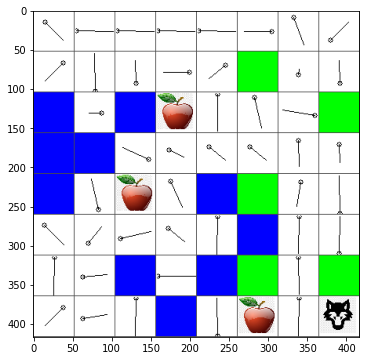

In [43]:
m.plot(Q)

## Überprüfung der Richtlinie

Da die Q-Tabelle die "Attraktivität" jeder Aktion in jedem Zustand auflistet, ist es ziemlich einfach, sie zu verwenden, um die effiziente Navigation in unserer Welt zu definieren. Im einfachsten Fall können wir einfach die Aktion auswählen, die dem höchsten Wert in der Q-Tabelle entspricht:


In [13]:
# code block 9

2

Wenn Sie den obigen Code mehrmals ausprobieren, werden Sie möglicherweise feststellen, dass er manchmal einfach "hängen bleibt" und Sie die STOP-Taste im Notebook drücken müssen, um ihn zu unterbrechen.

> **Aufgabe 1:** Ändern Sie die `walk`-Funktion, um die maximale Pfadlänge auf eine bestimmte Anzahl von Schritten (z. B. 100) zu begrenzen, und beobachten Sie, wie der obige Code diesen Wert von Zeit zu Zeit zurückgibt.

> **Aufgabe 2:** Ändern Sie die `walk`-Funktion so, dass sie nicht zu Orten zurückkehrt, an denen sie zuvor bereits gewesen ist. Dies wird verhindern, dass `walk` in Schleifen gerät, jedoch kann der Agent trotzdem an einem Ort "gefangen" werden, von dem er nicht entkommen kann.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


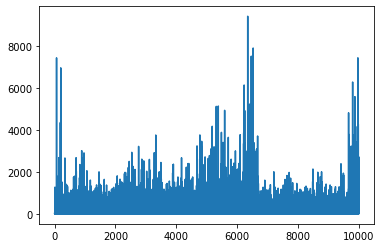

In [57]:
plt.plot(lpath)

## Übung
## Eine realistischere Welt von Peter und der Wolf



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, weisen wir darauf hin, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
